# 6장 로지스틱 회귀 모델: 참 거짓 판단하기

- 로지스틱 회귀(logistic regression): 참과 거짓 중 하나를 내놓는 과정

## 1. 로지스틱 회귀의 정의

- 로지스틱 회귀: 선형 회귀와 같은 직선이 아니라 참(1)과 거짓(0) 사이를 구분하는 S자 형태의 선을 그어 주는 작업

## 2. 시그모이드 함수

- 시그모이드 함수(sigmoid function)
    - $y = \frac{1}{1 + e^{-(ax + b)}}$
    - a: 그래프의 경사도
    - b: 그래프의 좌우 이동
- $a$ 값이 작아지면 오차는 무한대로 증가
- $a$ 값이 커지더라도 오차가 없어지지 않음
- $b$ 값이 너무 작아지거나 커지면 오차는 무한대로 증가

## 3. 오차 공식

- 시그모이드 함수는 평균 제곱 오차를 사용할 수 없음
- 시그모이드 함수의 특징은 $y$ 값이 0과 1 사이
    - 실제 값이 1일 때 예측 값이 0에 가까워지면 오차 증가
    - 실제 값이 0일 때 예측 값이 1에 가까워지면 오차 증가

## 4. 로그 함수

- 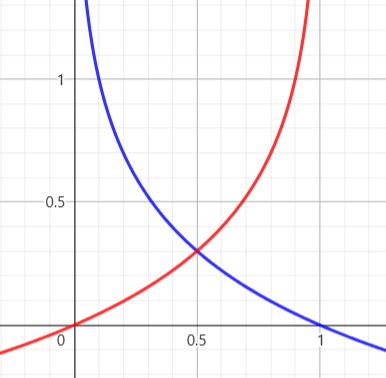
    - 파란 선은 실제 값이 1일 때 사용할 수 있는 그래프
        - $-\log{h}$
        - 예측 값이 1일 때 오차가 0이고, 예측 값이 0에 가까울수록 오차는 증가
    - 빨간 선은 실제 값이 0일 때 사용할 수 있는 그래프
        - $-\log{(1 - h)}$
        - 예측 값이 0일 때 오차가 없고, 1에 가까워질수록 오차가 증가
    - 두 경우를 하나로 합치면 교차 엔트로피 오차(cross entropy error) 함수
        - $-\{y\log{h} + (1 - y)\log{(1 - h)}\}$
        - 실제 값이 1이면 $(1 - y)\log{(1 - h)} = 0$
        - 실제 값이 0이면 $y\log{h} = 0$

## 5. 텐서플로에서 실행하는 로지스틱 회귀 모델

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
x = np.array([2, 4, 6, 8, 10, 12, 14])
y = np.array([0, 0, 0, 1, 1, 1, 1])

In [3]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation="sigmoid"))

c:\Users\Hyeonsik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# 교차 엔트로피 오차 함수를 이용하기 위해 "binary_crossentropy"로 설정합니다.
model.compile(optimizer="sgd", loss="binary_crossentropy")
model.fit(x, y, epochs=5000)

Epoch 1/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - loss: 1.1927
Epoch 2/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.1658
Epoch 3/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.1392
Epoch 4/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.1128
Epoch 5/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.0867
Epoch 6/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.0609
Epoch 7/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.0354
Epoch 8/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.0102
Epoch 9/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.9854
Epoch 10/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.9609
Epoch 11/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.9369
Epoch 12/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.9132
Epoch 13/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.8901
Epoch 14/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.8674
Epoch 15/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.8453
Epo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


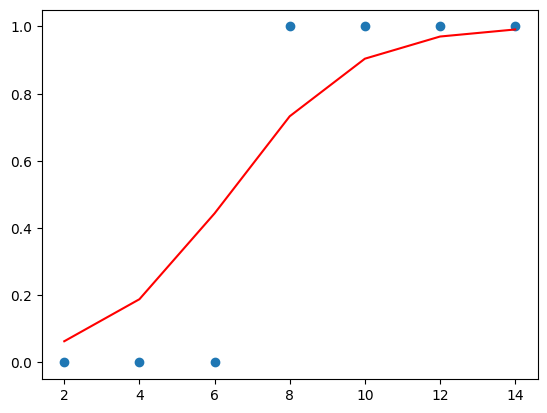

In [5]:
# 그래프로 확인해 봅니다.
plt.scatter(x, y)
plt.plot(x, model.predict(x), "r")
plt.show()

In [6]:
# 임의의 학습 시간을 집어넣어 합격 예상 확률을 예측해 보겠습니다.
import tensorflow as tf

hour = 7
input_data = tf.constant([hour])
prediction = model.predict(input_data)[0][0]
print(
    "%.f시간을 공부할 경우, 합격 예상 확률은 %.01f%%입니다." % (hour, prediction * 100)
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
7시간을 공부할 경우, 합격 예상 확률은 59.7%입니다.
